In [8]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings("ignore")  # To suppress warnings

In [4]:
## combining both the data so its easy to do the analysis
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
## loading the train csv data
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
## loading the statistical info
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
## loading the datatype info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

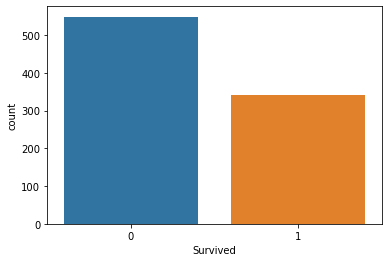

In [9]:
## categorical attributes
sns.countplot(train['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

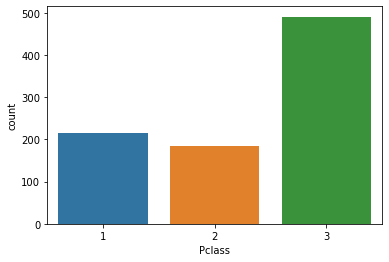

In [10]:
## categorical attributes
sns.countplot(train['Pclass'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

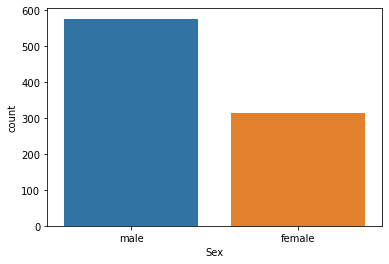

In [11]:
## categorical attributes
sns.countplot(train['Sex'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

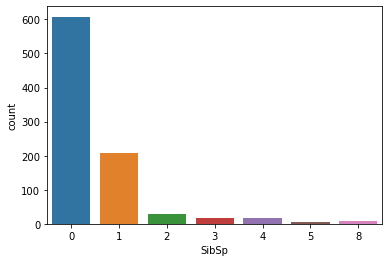

In [12]:
## categorical attributes
sns.countplot(train['SibSp'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

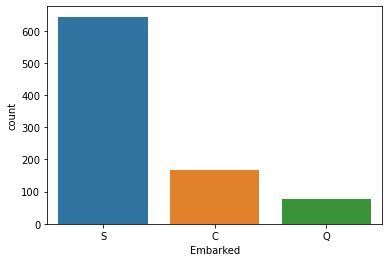

In [13]:
## categorical attributes
sns.countplot(train['Embarked'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

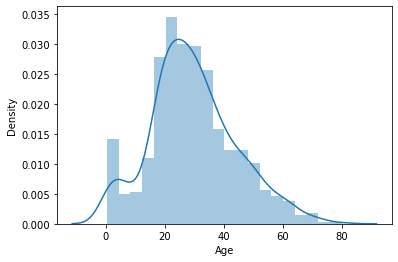

In [14]:
## Numerical attributes
sns.distplot(train['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

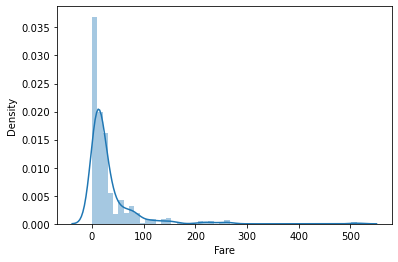

In [15]:
## Numerical attributes
sns.distplot(train['Fare'])

AttributeError: module 'matplotlib.pyplot' has no attribute 'Xticks'

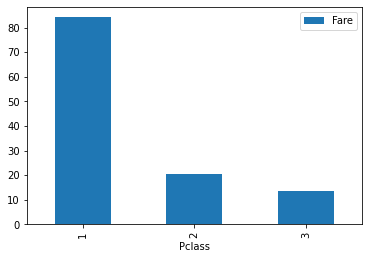

In [16]:
class_fare = train_df.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind ='bar')
plt.xlabel('Pclass')
plt.Xticks(rotation=0)
plt.ylabel('Avg Fare')
plt.show()

In [17]:
class_fare = train.pivot_table(index='Pclass', values='Fare' aggfunc = np.sum)
class_fare.plot(kind ='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.Xticks(rotation=0)
plt.show()

SyntaxError: invalid syntax (1668333446.py, line 1)

## data preprocessing


In [20]:
train_len = len(train)
## combine two dataframes
df = pd.concat([train, test], axis=0)
df = df.reset_index()
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2.0,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3.0,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4.0,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5.0,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df.tail()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,413,NaN,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,414,NaN,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,415,NaN,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,416,NaN,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,417,NaN,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [22]:
train_len

891

In [23]:
##find the null values
df.isnull().sum()

index             0
PassengerId     418
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [24]:
# drop the column
df = df.drop(columns=['Cabin'], axis=1)

In [25]:
df['Age'].mean()

29.881137667304014

In [27]:
## fill missing values using mean of the numerical column
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [28]:
df['Embarked'].mode()[0]

'S'

In [29]:
## fill missing values using mean of the categorical column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


## log transformation for uniform data distribution


<AxesSubplot:xlabel='Fare', ylabel='Density'>

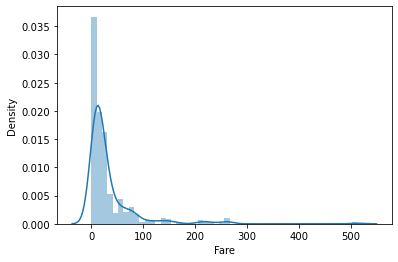

In [31]:
sns.distplot(df['Fare'])

In [32]:
df['Fare'] = np.log(df['Fare']+1)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

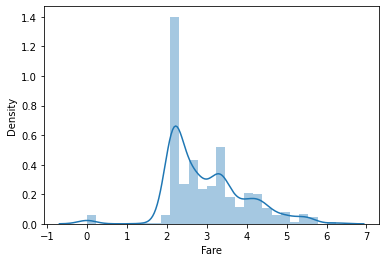

In [33]:
sns.distplot(df['Fare'])

## correlation matrix